In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_excel(r"FlightPrediction\Data_Train.xlsx")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Preview of data

In [3]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
train.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train.shape

(10683, 11)

In [7]:
# missing value checking
train.isna().sum()
# only 2 missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train.Total_Stops.nunique()

5

In [9]:
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [10]:
#checking duplicates
train.duplicated().sum()
#220 duplicate values

220

In [11]:
train.Airline.unique() # there is no ranking in the first view,/ we can make ranking..its our choise. can we make on the basis of profit

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
train.Airline.mode()[0]

'Jet Airways'

In [13]:
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
train.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [15]:
train.Date_of_Journey.nunique()

44

In [16]:
train.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [17]:
train.Date_of_Journey.str.split("/").str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [18]:
train['Date']=train.Date_of_Journey.str.split("/").str[0]
train['month']=train.Date_of_Journey.str.split("/").str[1]
train['year']=train.Date_of_Journey.str.split("/").str[2]

In [19]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [20]:
# droping the column of date of journey
train.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [22]:
train['Date']=train['Date'].astype(int)

In [23]:
train['month']=train['month'].astype(int)

In [24]:
train['year']=train['year'].astype(int)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  month            10683 non-null  int32 
 12  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [26]:
train['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [27]:
#converting dep time to hrs and minutes
train['Dep_Time_Hrs']=train['Dep_Time'].str.split(":").str[0]

In [28]:
train['Dep_Time_min']=train['Dep_Time'].str.split(":").str[1]

In [29]:
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [30]:
#dropping Dep_Time
train.drop('Dep_Time',axis=1,inplace=True)

In [31]:
train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  Dep_Time_Hrs     10683 non-null  object
 13  Dep_Time_min     10683 non-null  object
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [33]:
# we should convert the object dep_time to intgr
train['Dep_Time_min']=train['Dep_Time_min'].astype(int)
train['Dep_Time_Hrs']=train['Dep_Time_Hrs'].astype(int)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  Dep_Time_Hrs     10683 non-null  int32 
 13  Dep_Time_min     10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [35]:
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [36]:
train.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
train.Route.unique() #its difficult to make relationship with these datas..so we keep this aside

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [38]:
train.Route.nunique()

128

In [39]:
train.Arrival_Time.nunique()

1343

In [40]:
train.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [41]:
train.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [42]:
train.Arrival_Time.apply(lambda x:x.split(" ")[0])
# train.Arrival_Time.str.split(" ").str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [43]:
train['Arrival_hr']=train.Arrival_Time.apply(lambda x:x.split(":")[0])
train['Arrival_min']=train.Arrival_Time.apply(lambda x:x.split(":")[0])

In [44]:
train.drop('Arrival_Time',axis=1,inplace=True)

In [45]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,13


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   month            10683 non-null  int32 
 10  year             10683 non-null  int32 
 11  Dep_Time_Hrs     10683 non-null  int32 
 12  Dep_Time_min     10683 non-null  int32 
 13  Arrival_hr       10683 non-null  object
 14  Arrival_min      10683 non-null  object
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [47]:
train['Arrival_hr']=train['Arrival_hr'].astype(int)
train['Arrival_min']=train['Arrival_min'].astype(int)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   month            10683 non-null  int32 
 10  year             10683 non-null  int32 
 11  Dep_Time_Hrs     10683 non-null  int32 
 12  Dep_Time_min     10683 non-null  int32 
 13  Arrival_hr       10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [49]:
# cleaning Duration
train.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [50]:
train.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [51]:
train.Duration.nunique()

368

In [52]:
# split the hours only eliminate the minutes
train['Duration']=train['Duration'].apply(lambda x:x.split("h")[0])

In [53]:
train['Duration'].unique()# here '5m' data is there..its an invalid data,so we can delete that row

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [54]:
#finding the row containg 5m
train[train['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,16


In [55]:
train.drop(6474,axis=0,inplace=True)

In [56]:
train[train['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int32 
 9   month            10682 non-null  int32 
 10  year             10682 non-null  int32 
 11  Dep_Time_Hrs     10682 non-null  int32 
 12  Dep_Time_min     10682 non-null  int32 
 13  Arrival_hr       10682 non-null  int32 
 14  Arrival_min      10682 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 1.0+ MB


In [58]:
train['Duration']=train['Duration'].astype(int)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10682 non-null  int32 
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int32 
 9   month            10682 non-null  int32 
 10  year             10682 non-null  int32 
 11  Dep_Time_Hrs     10682 non-null  int32 
 12  Dep_Time_min     10682 non-null  int32 
 13  Arrival_hr       10682 non-null  int32 
 14  Arrival_min      10682 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 1001.4+ KB


Missing Value Treatment

In [61]:
# Missing value treatment--- only 2 missing values are there
train.isna().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
month              0
year               0
Dep_Time_Hrs       0
Dep_Time_min       0
Arrival_hr         0
Arrival_min        0
dtype: int64

In [62]:
train['Total_Stops'].isna().sum()

1

In [63]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [64]:
# importing the user defined function from another file
# from preprocessingFunction import*   # import all functions in the preprocessingFunction
from preprocessingFunction import fill_missing_values
fill_missing_values(data=train,fill_value=0,fill_types='Mode_Fill',columns=['Total_Stops'],dataframe_name='train')


Missing Values BEFORE REMOVAL in  train  data


Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
month              0
year               0
Dep_Time_Hrs       0
Dep_Time_min       0
Arrival_hr         0
Arrival_min        0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
month              0
year               0
Dep_Time_Hrs       0
Dep_Time_min       0
Arrival_hr         0
Arrival_min        0
dtype: int64

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2,non-stop,No info,3897,24,3,2019,22,20,1,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7,2 stops,No info,7662,1,5,2019,5,50,13,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19,2 stops,No info,13882,9,6,2019,9,25,4,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5,1 stop,No info,6218,12,5,2019,18,5,23,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4,1 stop,No info,13302,1,3,2019,16,50,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2,non-stop,No info,4107,9,4,2019,19,55,22,22
10679,Air India,Kolkata,Banglore,CCU → BLR,2,non-stop,No info,4145,27,4,2019,20,45,23,23
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3,non-stop,No info,7229,27,4,2019,8,20,11,11
10681,Vistara,Banglore,New Delhi,BLR → DEL,2,non-stop,No info,12648,1,3,2019,11,30,14,14


In [65]:
# this can be also done in the case of importing
# train['Total_Stops'].fillna(train['Total_Stops'].mode()[0],inplace=True)

In [66]:
train['Total_Stops'].isna().sum()

0

In [67]:
# dropping the column of Route
train.drop('Route',axis=1,inplace=True)

In [68]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,2,non-stop,No info,3897,24,3,2019,22,20,1,1
1,Air India,Kolkata,Banglore,7,2 stops,No info,7662,1,5,2019,5,50,13,13
2,Jet Airways,Delhi,Cochin,19,2 stops,No info,13882,9,6,2019,9,25,4,4
3,IndiGo,Kolkata,Banglore,5,1 stop,No info,6218,12,5,2019,18,5,23,23
4,IndiGo,Banglore,New Delhi,4,1 stop,No info,13302,1,3,2019,16,50,21,21


In [69]:
# Checking additional_info
train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [70]:
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Categorical Encoding

In [71]:
#1) Airline (we can't create order in this category)
train['Airline'].nunique()

12

In [72]:
# There are 12 unique value is there 
# LABEL ENCODING(ON THE BASIS OF LABELLING)
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [73]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_airline=LabelEncoder()
LabelEncoder_Source=LabelEncoder()
LabelEncoder_Destination=LabelEncoder()
LabelEncoder_Total_Stops=LabelEncoder()
LabelEncoder_Additional_Info=LabelEncoder()


train['Airline']=LabelEncoder_airline.fit_transform(train['Airline'])
train['Source']=LabelEncoder_Source.fit_transform(train['Source'])
train['Destination']=LabelEncoder_Destination.fit_transform(train['Destination'])
train['Total_Stops']=LabelEncoder_Total_Stops.fit_transform(train['Total_Stops'])
train['Additional_Info']=LabelEncoder_Additional_Info.fit_transform(train['Additional_Info'])

In [75]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
0,3,0,5,2,4,8,3897,24,3,2019,22,20,1,1
1,1,3,0,7,1,8,7662,1,5,2019,5,50,13,13
2,4,2,1,19,1,8,13882,9,6,2019,9,25,4,4
3,3,3,0,5,0,8,6218,12,5,2019,18,5,23,23
4,3,0,5,4,0,8,13302,1,3,2019,16,50,21,21


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int32
 1   Source           10682 non-null  int32
 2   Destination      10682 non-null  int32
 3   Duration         10682 non-null  int32
 4   Total_Stops      10682 non-null  int32
 5   Additional_Info  10682 non-null  int32
 6   Price            10682 non-null  int64
 7   Date             10682 non-null  int32
 8   month            10682 non-null  int32
 9   year             10682 non-null  int32
 10  Dep_Time_Hrs     10682 non-null  int32
 11  Dep_Time_min     10682 non-null  int32
 12  Arrival_hr       10682 non-null  int32
 13  Arrival_min      10682 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 709.4 KB


In [77]:
LabelEncoder_Additional_Info.transform(['No info'])

array([8])

Outlier Treatment

In [78]:
train['Dep_Time_Hrs'].mean()

12.490357610934282

In [79]:
train['Dep_Time_Hrs'].std()

5.748818946566094

In [80]:
# Dropping the outlaiers with std
# mean + 3 * std--------> upper limit
# mean - 3 * std--------> lower limit

ul=train['Dep_Time_Hrs'].mean() + 3 * train['Dep_Time_Hrs'].std()
ll=train['Dep_Time_Hrs'].mean() - 3 * train['Dep_Time_Hrs'].std()

In [81]:
ul

29.736814450632565

In [82]:
ll

-4.7560992287640005

In [83]:
train['Dep_Time_Hrs']<ul

0        True
1        True
2        True
3        True
4        True
         ... 
10678    True
10679    True
10680    True
10681    True
10682    True
Name: Dep_Time_Hrs, Length: 10682, dtype: bool

In [84]:
train['Price'].mean()

9086.292735442801

In [85]:
train['Price'].std()

4610.8856953285895

In [86]:
ul=train['Price'].mean() + 3 * train['Price'].std()
ll=train['Price'].mean() - 3 * train['Price'].std()

In [88]:
train['Price']<ul

0        True
1        True
2        True
3        True
4        True
         ... 
10678    True
10679    True
10680    True
10681    True
10682    True
Name: Price, Length: 10682, dtype: bool

In [89]:
train[train['Price']<ul]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
0,3,0,5,2,4,8,3897,24,3,2019,22,20,1,1
1,1,3,0,7,1,8,7662,1,5,2019,5,50,13,13
2,4,2,1,19,1,8,13882,9,6,2019,9,25,4,4
3,3,3,0,5,0,8,6218,12,5,2019,18,5,23,23
4,3,0,5,4,0,8,13302,1,3,2019,16,50,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2,4,8,4107,9,4,2019,19,55,22,22
10679,1,3,0,2,4,8,4145,27,4,2019,20,45,23,23
10680,4,0,2,3,4,8,7229,27,4,2019,8,20,11,11
10681,10,0,5,2,4,8,12648,1,3,2019,11,30,14,14


In [90]:
train.shape

(10682, 14)

In [91]:
10682-10586  # 96 values are greater than upper limit

96

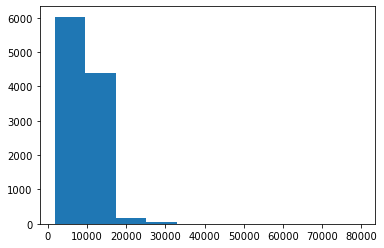

In [92]:
#Histogram
plt.hist(train['Price'])
plt.show()

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

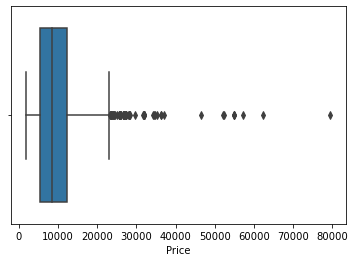

In [93]:
#boxplot
sns.boxplot('Price',data=train)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

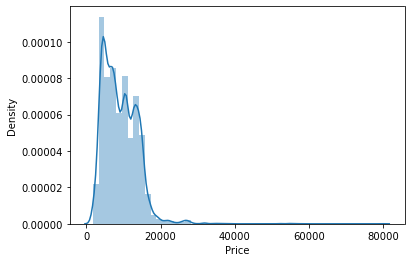

In [94]:
sns.distplot(train['Price'],bins=50)

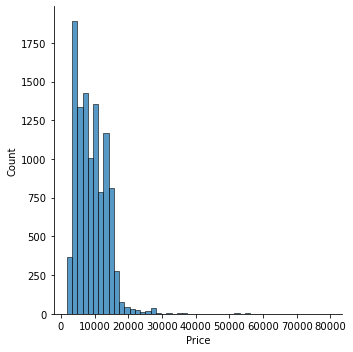

In [95]:
#Distribution plot
sns.displot(train['Price'],bins=50)

In [96]:
train['Price'].max() # max value is 79512, up is 22000 smthng .. therefore 79512 is treated as an outlier

79512

In [97]:
# Dropping the outlayer rows with percentiles

ul=train['Price'].quantile(0.95)
ll=train['Price'].quantile(0.05)

In [98]:
ul

15764.0

In [99]:
train['Price']>ul

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Price, Length: 10682, dtype: bool

In [100]:
train[train['Price']>ul]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
7,4,0,5,21,0,8,22270,1,3,2019,8,0,5,5
20,2,2,1,5,0,8,19495,6,3,2019,14,10,19,19
38,4,0,5,6,0,8,19225,6,3,2019,7,0,13,13
56,1,0,5,15,1,8,17345,1,3,2019,8,50,23,23
91,6,2,1,11,0,8,17057,6,3,2019,2,15,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,4,0,5,19,0,8,17261,6,3,2019,14,5,9,9
10625,4,2,1,7,1,5,19644,9,5,2019,11,40,19,19
10645,6,2,1,8,0,8,17057,3,3,2019,7,5,15,15
10668,4,2,1,7,1,8,21219,9,5,2019,11,40,19,19


In [101]:
# there are 526 rows are treated as outlayer 

In [102]:
# Drop or Cap 
#  we can drop the rows or cap the rows...
#  if we drop the rows 
#   ->information loss
#   ->misbehavior of model
# there fore caping is better

In [103]:
# Cap ( mean+3*std)

In [104]:
ul=train['Price'].mean() + 3 * train['Price'].std()
ll=train['Price'].mean() - 3 * train['Price'].std()

In [105]:
ul

22918.94982142857

In [106]:
train.loc[train['Price']>ul]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_Time_Hrs,Dep_Time_min,Arrival_hr,Arrival_min
123,1,2,1,20,0,8,27430,1,3,2019,23,0,19,19
396,6,2,1,6,0,8,36983,1,3,2019,12,50,19,19
486,4,0,5,6,0,8,26890,1,3,2019,8,55,15,15
510,4,0,5,5,0,8,26890,1,3,2019,7,0,12,12
597,1,4,3,29,1,8,25139,6,3,2019,9,40,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,21,1,8,24210,6,3,2019,19,50,16,16
10364,5,0,5,4,0,3,57209,1,3,2019,9,45,14,14
10383,4,0,5,22,0,8,26890,1,3,2019,7,0,5,5
10439,4,0,5,14,0,8,31825,1,3,2019,18,40,9,9


In [107]:
train.loc[train['Price']>ul,'Price']

123      27430
396      36983
486      26890
510      26890
597      25139
         ...  
10353    24210
10364    57209
10383    26890
10439    31825
10511    26480
Name: Price, Length: 96, dtype: int64

In [108]:
train.loc[train['Price']>ul,'Price']=ul

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

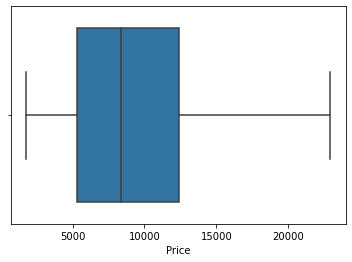

In [109]:
sns.boxplot('Price',data=train)

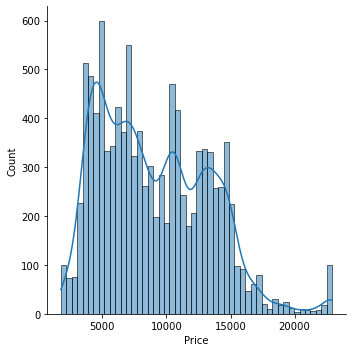

In [110]:
sns.displot(train['Price'],bins=50,kde=True)

In [111]:
train['Price'].max()

22918.94982142857